### Let us start by importing the required libraries

In [105]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [106]:
# uncomment and run the following lines for Google Colab
# from google.colab import drive
# drive.mount('/content/drive')

In [107]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** How many rows and columns are present in the data?

In [108]:
# Write your code here
df.shape #returns a tuple: (# of rows, # of columns)


(1898, 9)

#### Observations:
There are 1898 rows and 9 columns present in the data 

### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used)

In [109]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
Using df.info(), I see there are 3 different types of datatypes in the dataset. Varying from column to column, I see there are:
- 4 columns **[order_id, customer_id, food_preparation_time, delivery_time]** with an **int** datatype
- 4 columns **[restaurant_name, cuisine_type, day_of_the_week, rating]** with an **object** datatype 
- 1 column **[cost_of_the_order]** with a **float** datatype

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [110]:
# Write your code here
missing_values = df.isnull().sum() #isnull() returns if a value in a column is null, and sum() returns the sum of all for each column
missing_values

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
When looking at the df.info(), I saw that each column contains the same non-null count which showed me there are no missing values. I went ahead and used the isnull() function to confirm my assumptions and saw there are no null values.

In short, there are no missing values in the data 

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed?

In [111]:
# Write your code here
df.describe() #describe(): returns count, mean, std, min, 25%, 50%, 75%, and max for numerical columns

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
food_preparation_time
- minimum: 20 minutes
- average: 27.37 minutes
- maximum: 35 minutes

### **Question 5:** How many orders are not rated?

In [112]:
# Write the code here
not_rated = df['rating'].value_counts() #I accessed the 'rating' column in df and got count of each type of rating 
not_rated

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

#### Observations:
There are 736 orders not rated


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration)

- Histograms - check the shape of the distribution 
- Box Plots - 
- Bar Graphs - to show the count of observations in each bin 
- Lineplot
- Scatterplot


In [113]:
# Write the code here
print(df.describe())

           order_id    customer_id  cost_of_the_order  food_preparation_time  \
count  1.898000e+03    1898.000000        1898.000000            1898.000000   
mean   1.477496e+06  171168.478398          16.498851              27.371970   
std    5.480497e+02  113698.139743           7.483812               4.632481   
min    1.476547e+06    1311.000000           4.470000              20.000000   
25%    1.477021e+06   77787.750000          12.080000              23.000000   
50%    1.477496e+06  128600.000000          14.140000              27.000000   
75%    1.477970e+06  270525.000000          22.297500              31.000000   
max    1.478444e+06  405334.000000          35.410000              35.000000   

       delivery_time  
count    1898.000000  
mean       24.161749  
std         4.972637  
min        15.000000  
25%        20.000000  
50%        25.000000  
75%        28.000000  
max        33.000000  


- ##### When glancing at the data, I see cost_of_the_order has a somewhat high std - indicating the cost to be spread out from the mean. There also seems to be a big difference between the min and max cost

- ##### I also see that each percentile in food_preparation_time and delivery_time is about equally distant from its following percentile




<Axes: xlabel='cost_of_the_order', ylabel='Count'>

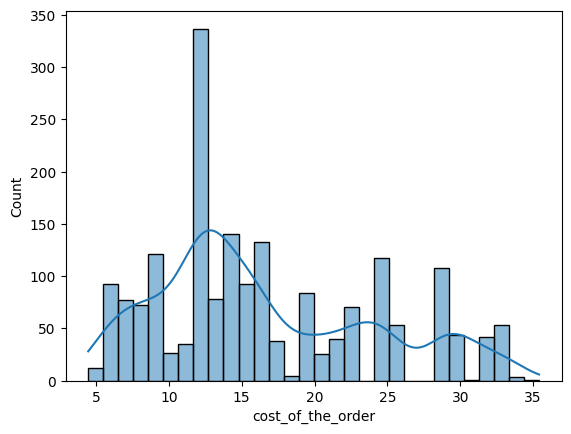

In [114]:
sns.histplot(data = df, x = 'cost_of_the_order', kde=True, bins = 30) #creating a histogram of the cost_of_the_order; kde set to true to see a trend line; 30 bins for the ~$30 range

- ##### This histogram confirms the notion that cost of the order is spread out with around 12$ being the most fequent cost, and it shows where some costs are concentrated

<Axes: xlabel='cost_of_the_order'>

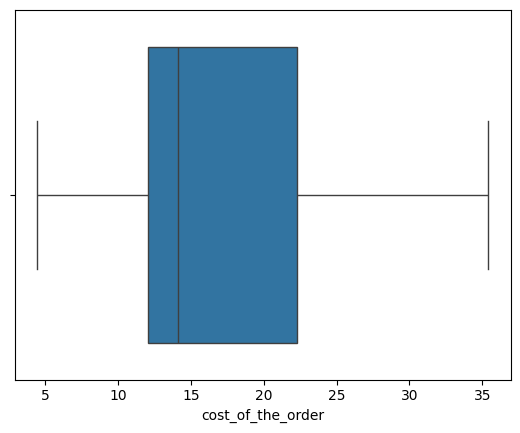

In [115]:
sns.boxplot(data=df, x ='cost_of_the_order') #creating a boxplot from the cost_of_the_order column

- ##### This boxplot visualizes the descriptive statistics and confirms there are no outliers in the cost of the orders 

<Axes: xlabel='food_preparation_time', ylabel='Count'>

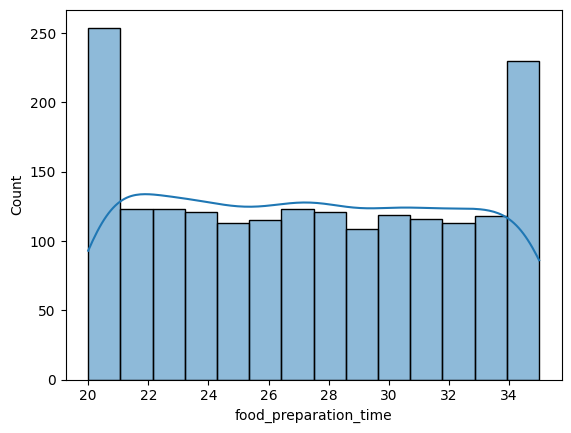

In [116]:
sns.histplot(data = df, x = 'food_preparation_time', kde=True, bins=14) #creating a histogram of the food_preparation_time

- ##### The food_preparation_time seems almost uniformly distributed, but with peaks at 20 and 34 minutes. 

<Axes: xlabel='food_preparation_time'>

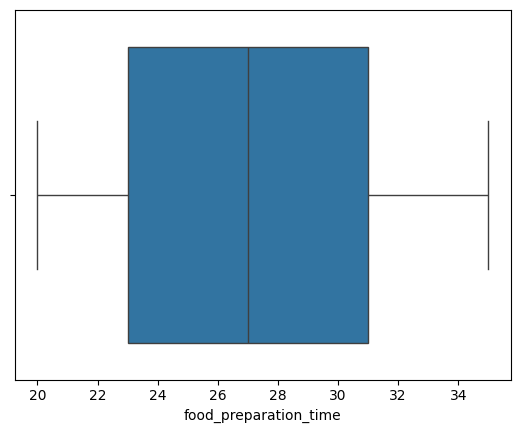

In [117]:
sns.boxplot(data=df, x ='food_preparation_time') #creating a boxplot from the food_preparation_time column

- ##### This boxplot shows that there is about 50% of data on each side of the median with no outliers in the data. 

In [118]:
duplicates = df['customer_id'].value_counts()[df['customer_id'].value_counts() > 1] #value_counts() counts the occurrences of each values and is then filtered to show only values that have appeared more than once 
duplicates

customer_id
52832     13
47440     10
83287      9
250494     8
259341     7
          ..
79255      2
342107     2
371590     2
106968     2
155124     2
Name: count, Length: 416, dtype: int64

- ##### The output of this code shows there are possibly 416 customers who have ordered multiple times, depending on how customer id is generated in the dataset


<Axes: xlabel='cuisine_type', ylabel='count'>

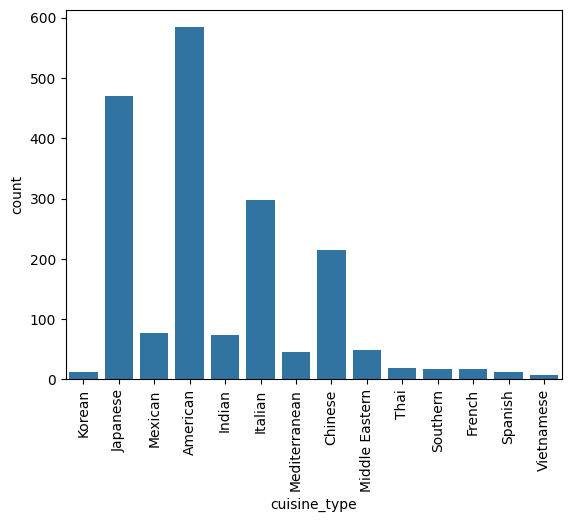

In [119]:
plt.xticks(rotation=90)
sns.countplot(data=df, x='cuisine_type') #countplot detailing the count of each type of cuisine 


- ##### This bargraph shows the amount of times each cuisine was ordered. I can see American was ordered the most, with smaller peaks at Japanese, Italian, and Chinese as well

<Axes: xlabel='cuisine_type'>

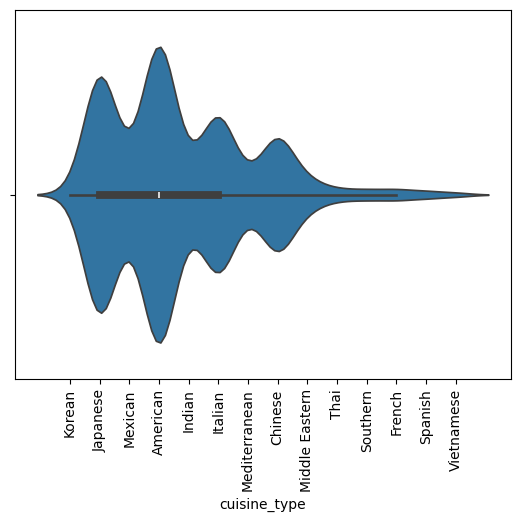

In [120]:
plt.xticks(rotation=90)
sns.violinplot(data=df, x='cuisine_type') #creating a violin plot with the distribution of cuisine type 

- ##### This plot summarizes the same information described in the bargraph above, but shows a more detailed visualization of the distribution 

<Axes: xlabel='restaurant_name', ylabel='count'>

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:89: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/events.py:89: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 140 (\x8c) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 142 (\x8e) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


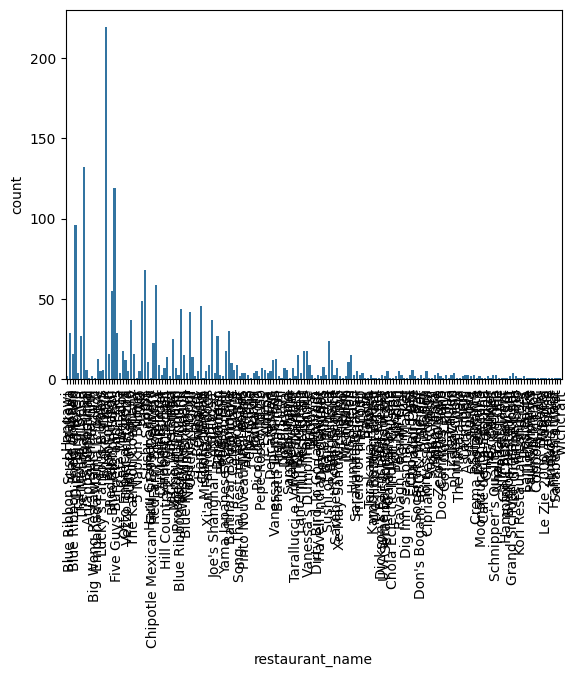

In [121]:
plt.xticks(rotation=90)

sns.countplot(data=df,x='restaurant_name') # creating a plot with the counts of all the restaurants 

- ##### This bargraph shows count of the orders from the numerous restaurants. It hints that there are a few restaurants with more than 50 order, and a restaurant peaking at almost 250 orders 

<Axes: xlabel='day_of_the_week', ylabel='count'>

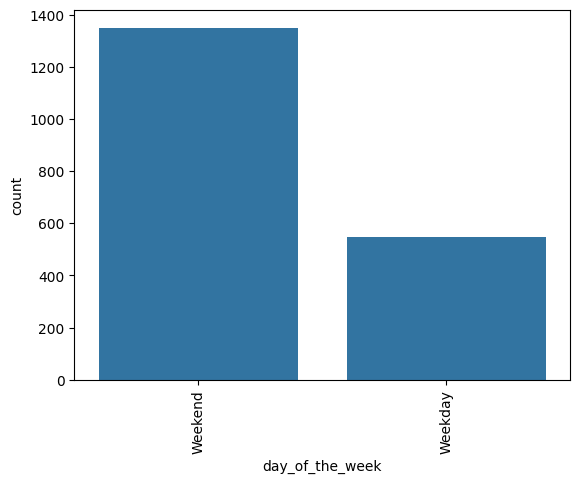

In [122]:
plt.xticks(rotation=90)

sns.countplot(data=df,x='day_of_the_week') #creating a count plot detailing the number of orders during the weekday/end

- ##### This bar graph shows the majority of orders are done during the weekend. Looking at it, the graph shows there are more than 2x orders on the weekends in comparison to the weekdays 

<Axes: xlabel='rating', ylabel='count'>

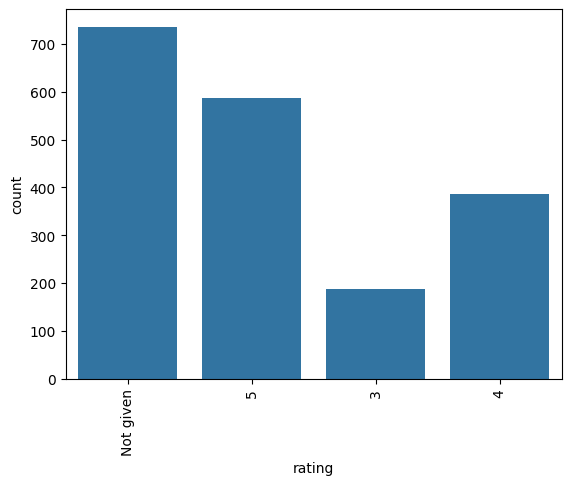

In [123]:
plt.xticks(rotation=90)

sns.countplot(data=df,x='rating') #creating a count plot showing the overall number of each rating  

- ##### This bar graph shows out of the 1898 orders, almost half of them have no rating given to them. 
- ##### The bar graph shows there are more '5' ratings than '4' or '3'. 
    - ##### In addition to the order being a '5' rating, it is possible people don't rate the order unless they think it's a '5' or choose '5' every time - possibly explaining some skewness in the data 

<Axes: xlabel='rating'>

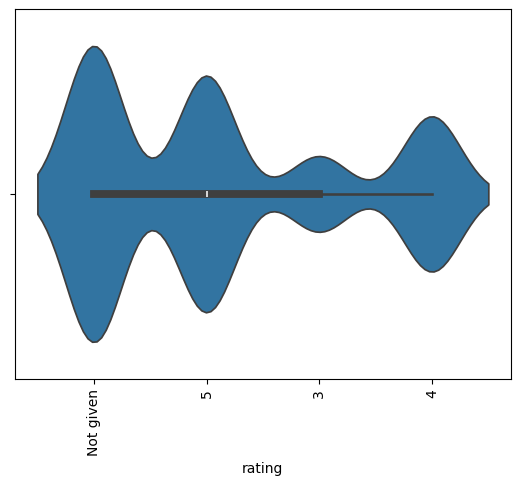

In [124]:
plt.xticks(rotation=90)
sns.violinplot(data=df, x='rating') # creating a violin plot to display the distribution of ratings 

- ##### This violin plot gives a better visualization of the distribution of different ratings, clearly showing a peak at 'not given' and the least in '3'

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received?

In [125]:
# Write the code here
df.restaurant_name.value_counts().head(5) # checking the top 5 values from the amount of times each restaurant was ordered from 

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

- ##### The top 5 resaturants in terms of the number of orders receieved are:
    - Shake Shack
    - The Meatball Shop
    - Blue Ribbon Sushio
    - Blue Ribbon Fried Chicken
    - Parm

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends?

In [126]:
# Write the code here
weekend_count = df[df['day_of_the_week']== 'Weekend'] # setting the df to contain only weekend orders 
weekend_count.cuisine_type.value_counts().head() #checking the top 5 most popular cuisines 

cuisine_type
American    415
Japanese    335
Italian     207
Chinese     163
Mexican      53
Name: count, dtype: int64

- ##### The most popular cuisine on weekends is 'American'

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars?

In [127]:
df.value_counts([df.cost_of_the_order>20])/df.shape[0] * 100 # finding the number of orders that cost more than 20$, then dividing that number by the total number of order, and multiplying that by 100 

cost_of_the_order
False                70.758693
True                 29.241307
Name: count, dtype: float64

#### Observations:
- ##### 29.24% of orders cost more than 20$


### **Question 10**: What is the mean order delivery time?

In [128]:
# Write the code here
df.delivery_time.describe() #describe function gives an overview of the descriptional stats 

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64

#### Observations:
- ##### The mean delivery time is 24.16 minutes

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed

In [129]:
# Write the code here
df.value_counts([df.customer_id]).head() #finding the 5 customers who appeared the most using value counts 

customer_id
52832          13
47440          10
83287           9
250494          8
65009           7
Name: count, dtype: int64

#### Observations: 
**customer_id, Number of orders placed**
----------------------------------
        52832     |    13

        47440     |    10

        83287     |     9

        250494    |     8

        65009     |     7



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

In [130]:
# Write the code here
df[['cost_of_the_order','food_preparation_time','delivery_time','order_id']].corr() #first checking the correlation between all numerical variables 

,cost_of_the_order,food_preparation_time,delivery_time,order_id
cost_of_the_order,1.000000,0.041527,-0.029949,0.021171
food_preparation_time,0.041527,1.000000,0.011094,-0.007026
delivery_time,-0.029949,0.011094,1.000000,0.009690
order_id,0.021171,-0.007026,0.009690,1.000000


- ##### Starting a multivariate analysis, I made a correlation matrix to get an overview of the correlation between numerical variables
- ##### I see there isn't any sort of strong positive or negative correlation between any numerical variables so far 

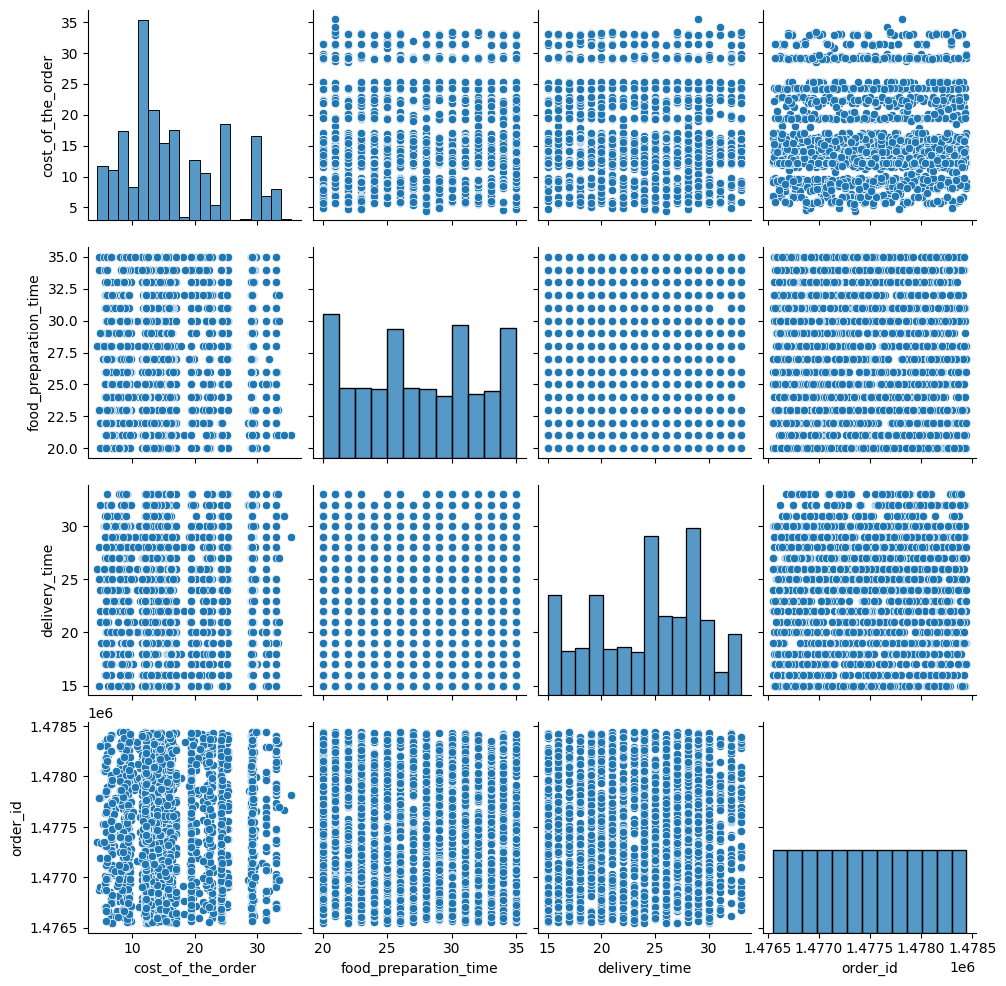

In [131]:
sns.pairplot(df[['cost_of_the_order','food_preparation_time','delivery_time','order_id']]) #creating a pairplot of the numerical variables 

- ##### I made a pairplot to visualize the relationship between numerical variables, and I see there is a large amount of noise in the data making it a bit difficult to visualize a specific type of relationship

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,27.212066,4.708616,20.0,23.0,27.0,31.0,35.0
Weekend,1351.0,27.436714,4.601476,20.0,23.0,27.0,31.0,35.0


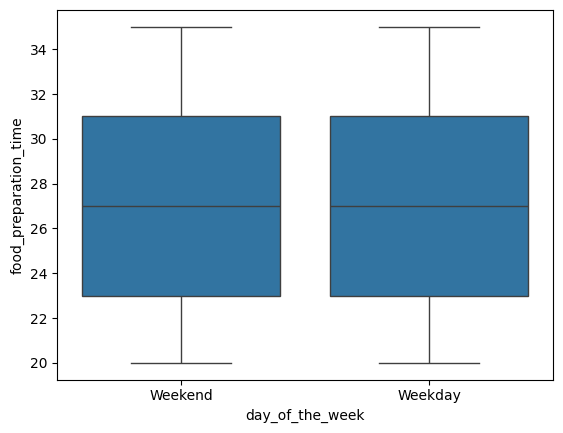

In [132]:

sns.boxplot(data=df, x = 'day_of_the_week', y = 'food_preparation_time') #creating a box plot with day of the week as the x-axis and food preparation time as the y axis 
df.groupby(['day_of_the_week'])['food_preparation_time'].describe() #Displaying the descriptive statistics of food preparation time based on the day of the week 

- ##### Looking at the barplot and the descriptive statistics of food preparation time in relation to the day of the week, I see the stats look the same with similar mean and standard deviation. 
- ##### This could be hinting at the fact that the day of the week does not alter food preparation time 

,count,mean,std,min,25%,50%,75%,max
day_of_the_week,,,,,,,,
Weekday,547.0,28.340037,2.891428,24.0,26.0,28.0,31.0,33.0
Weekend,1351.0,22.470022,4.628938,15.0,18.5,22.0,27.0,30.0


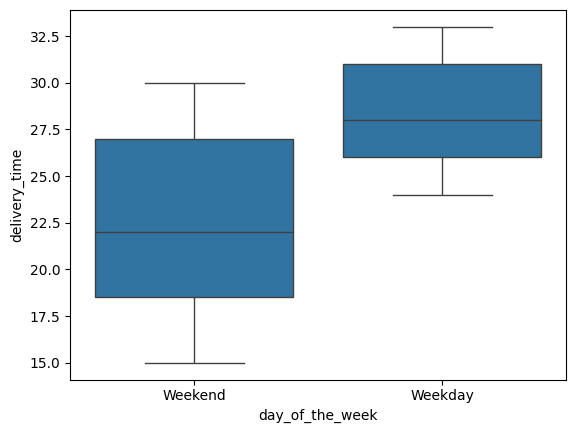

In [133]:

sns.boxplot(data=df, x = 'day_of_the_week', y = 'delivery_time') #creating a box plot with day of the week as the x-axis and delivery as the y axis 
df.groupby(['day_of_the_week'])['delivery_time'].describe() #Displaying the descriptive statistics of delivery time based on the day of the week 

- ##### Looking at the descriptive statistics and barplot, there seems to be an obvious difference in delivery time in relation to the day of the week
- ##### On average, it delivery takes longer during the weekday in comparison to the weekend by about 6 minutes, but there is more volatility in the delivery times on the weekend as described by the standard deviation 
- ##### Looking at the barplot, I see the both the minimum and maximum delivery time on the weekend are less than the minimum and maximum delivery time during the weekdays 
- ##### I also see the both the overall range and interquartile range are greater on the weekend than the weekday. 
- ##### This difference in delivery time and volatility can be due to the fact that there is a much greater amount of orders placed on the weekends in comparison to the weekdays as we saw before - 

,count,unique,top,freq
day_of_the_week,,,,
Weekday,547,4,Not given,207
Weekend,1351,4,Not given,529


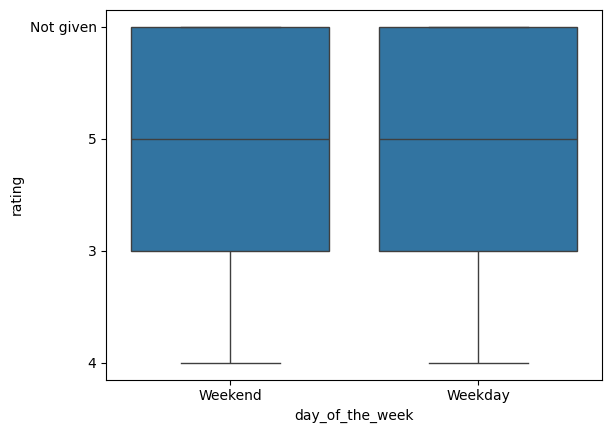

In [134]:
sns.boxplot(data=df, x = 'day_of_the_week', y = 'rating')  #creating a box plot with day of the week as the x-axis and rating as the y axis 
df.groupby(['day_of_the_week'])['rating'].describe() #Displaying the descriptive statistics of rating based on the day of the week 

- ##### This bar graph shows me there isn't a difference in ratings whether the order was made during the weekday or weekend

day_of_the_week  cuisine_type  
Weekday          American          169
                 Japanese          135
                 Italian            91
                 Chinese            52
                 Indian             24
                 Mexican            24
                 Middle Eastern     17
                 Mediterranean      14
                 Southern            6
                 French              5
                 Thai                4
                 Vietnamese          3
                 Korean              2
                 Spanish             1
Weekend          American          415
                 Japanese          335
                 Italian           207
                 Chinese           163
                 Mexican            53
                 Indian             49
                 Mediterranean      32
                 Middle Eastern     32
                 Thai               15
                 French             13
                 Korean         

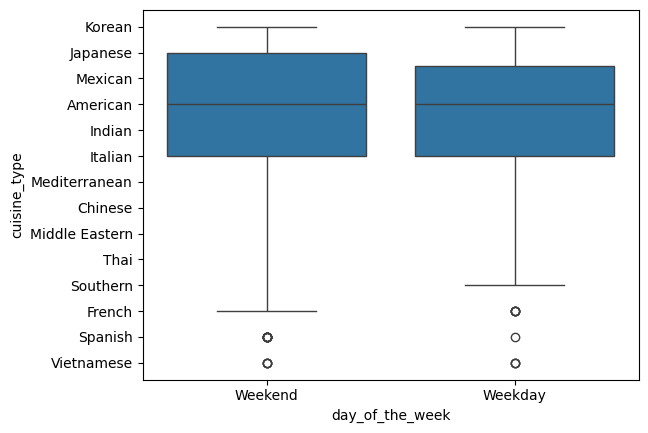

In [135]:
sns.boxplot(data=df, x = 'day_of_the_week', y = 'cuisine_type') #creating a box plot with day of the week as the x-axis and cuisine as the y axis 
df.groupby(['day_of_the_week'])['cuisine_type'].value_counts() #Displaying the value count of each cuisine based on the day of the week 


- ##### When grouping the data, I see the top 4 cuisines remaine same regardless of the day_of_the_week
- ##### Even though the boxplot is indicating outliers, when looking at the grouped data it shows there isn't much of a change in the distribution of cuisine types in relation to the day of the week

<Axes: xlabel='day_of_the_week', ylabel='cuisine_type'>

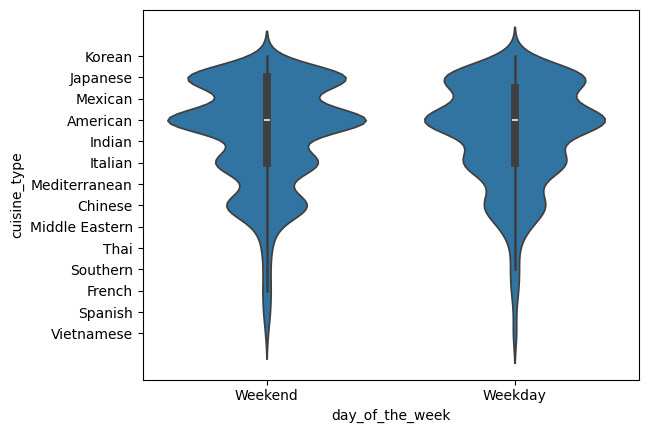

In [136]:
sns.violinplot(data=df, x = 'day_of_the_week', y = 'cuisine_type') #creating a violin with day of the week as the x-axis and rating as the y axis 

- ##### This violin plot gives a better visualization of the distribution of cuisine type in relation to the day of the week
- ##### The plot confirms the notion there isn't much change in cuisine type in relation to the day of the week

day_of_the_week  rating   
Weekday          Not given    207
                 5            168
                 4            109
                 3             63
Weekend          Not given    529
                 5            420
                 4            277
                 3            125
Name: count, dtype: int64

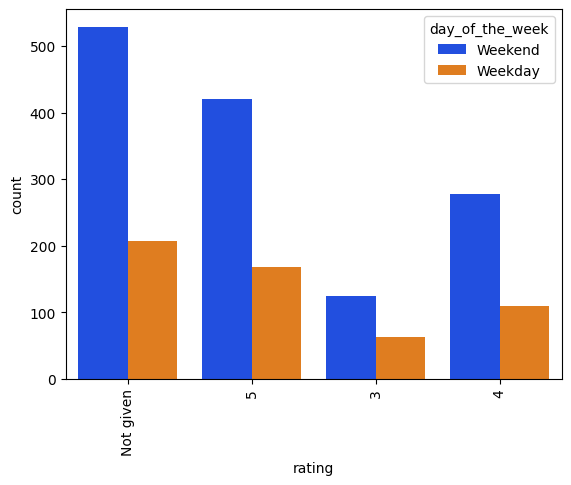

In [137]:
plt.xticks(rotation=90)
sns.countplot(data=df, x = 'rating', hue= 'day_of_the_week', palette='bright') #creating a countplot of the number of ratings given based on the day of the week 
df.groupby(['day_of_the_week'])['rating'].value_counts() #displaying the number of ratings given based on the day of the week 

- ##### Based on the countplot, there is a major gap between the amount of ratings in comparison too the weekends and weekdays. I think this can be just because there are many more orders on the weekend 
- ##### The difference in 3 ratings don't seems to change as much as the other ratings in the transition from weekday to weekend
- ##### It seems people give much less '3' ratings on the weekend in comparison to the other rating 
- ##### Regardless of the day, the most ratings are 'Not given'

cuisine_type    rating   
American        Not given    216
                5            174
                4            130
                3             64
Chinese         Not given     82
                5             69
                4             40
                3             24
French          Not given      8
                5              5
                4              3
                3              2
Indian          5             32
                Not given     23
                4             13
                3              5
Italian         Not given    126
                5             90
                4             54
                3             28
Japanese        Not given    197
                5            142
                4             91
                3             40
Korean          4              4
                Not given      4
                5              3
                3              2
Mediterranean   5             16
                N

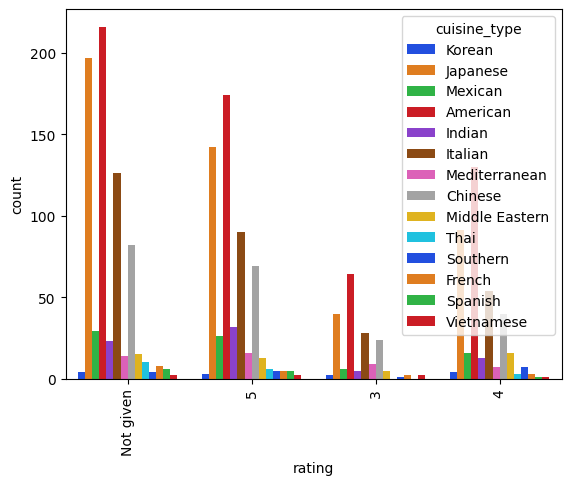

In [138]:
plt.xticks(rotation=90)
sns.countplot(data=df, x = 'rating', hue= 'cuisine_type', palette='bright') #displaying the number of each ratings given to each cuisine    
df.groupby(['cuisine_type'])['rating'].value_counts() #displaying the amount of each rating each cuisine received 

- ##### With the histogram I see a general trend for each type of cuisine where the rating is mostly 'Not given' and the concentration of ratings decreases as the rating decreases from a 5 to a 3

<Axes: xlabel='cuisine_type', ylabel='count'>

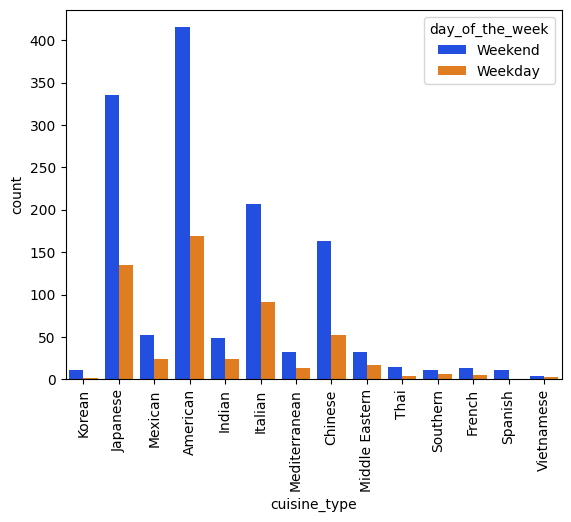

In [139]:
plt.xticks(rotation=90)
sns.countplot(data=df, x = 'cuisine_type', hue= 'day_of_the_week', palette='bright') #displaying the amount each cuisine was ordered based on the day of the week 

- ##### Although there are more orders for every type of cuisine on the weekend; American, Japanese, Italian, and Chinese have a great increase in the amount of orders during the weekend
- ##### It seems Korean and Spanish cuisine are mostly only ordered on the weekends 

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,24.193493,4.831844,15.0,20.00,25.0,28.00,33.0
Chinese,215.0,23.855814,4.966491,15.0,20.00,24.0,28.00,33.0
French,18.0,25.333333,3.741657,17.0,23.25,27.0,28.75,29.0
Indian,73.0,24.082192,5.054573,15.0,20.00,25.0,29.00,32.0
Italian,298.0,24.567114,5.179329,15.0,20.00,26.0,28.75,33.0
Japanese,470.0,24.131915,4.987366,15.0,20.00,25.0,28.00,33.0
Korean,13.0,20.923077,4.030334,16.0,17.00,20.0,26.00,26.0
Mediterranean,46.0,23.586957,5.422489,15.0,19.00,24.0,28.75,33.0
Mexican,77.0,24.389610,4.559997,16.0,21.00,25.0,28.00,33.0


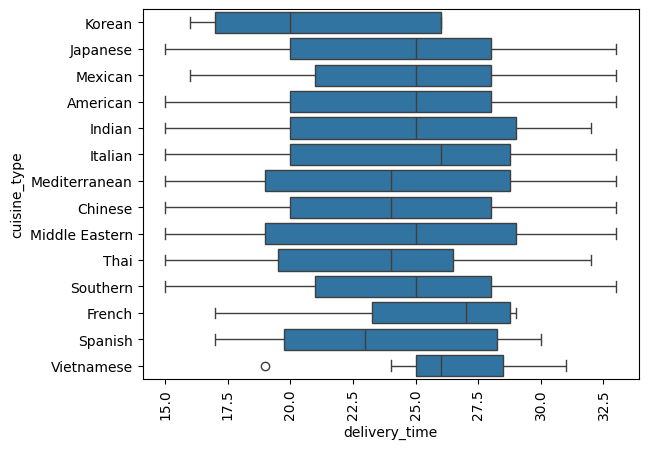

In [140]:
plt.xticks(rotation=90)
sns.boxplot(data=df, y = 'cuisine_type', x = 'delivery_time') #creating a box plot with each cuisine type displayed on the y-axis  and delivery time on the y-axis 
df.groupby(['cuisine_type'])['delivery_time'].describe() #displaying the descriptional stats of each cuisine's delivery time distribution 

- ##### From these boxplots, I see the cuisines with the greatest number of orders have similar means and standard deviation.
- ##### Vietnamese food on average has the longest delivery time with the a relatively small standard deviation
- ##### Southern food has the largest standard deviation, while French food has the smallest standard deviation
- ##### Korean food has the smallest average delivery time, with an outlier at about 19 minutes

,count,mean,std,min,25%,50%,75%,max
cuisine_type,,,,,,,,
American,584.0,27.440068,4.658474,20.0,23.00,27.0,31.0,35.0
Chinese,215.0,27.511628,4.758525,20.0,23.50,27.0,32.0,35.0
French,18.0,26.888889,5.039712,21.0,22.50,25.5,31.0,35.0
Indian,73.0,27.109589,4.620491,20.0,23.00,27.0,31.0,35.0
Italian,298.0,27.483221,4.519474,20.0,23.00,28.0,31.0,35.0
Japanese,470.0,27.510638,4.604496,20.0,24.00,27.5,32.0,35.0
Korean,13.0,25.461538,3.971049,20.0,23.00,25.0,26.0,33.0
Mediterranean,46.0,27.000000,4.908043,20.0,23.00,27.0,31.0,35.0
Mexican,77.0,26.727273,4.604450,20.0,23.00,26.0,31.0,35.0


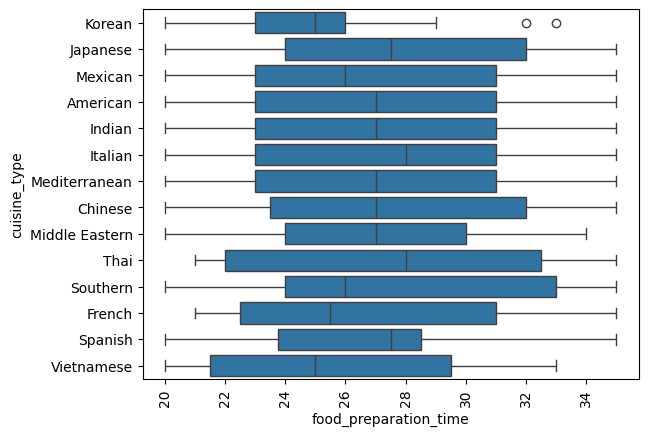

In [141]:
plt.xticks(rotation=90)
sns.boxplot(data=df, y = 'cuisine_type', x = 'food_preparation_time') #creating a box plot with each cuisine type displayed on the y-axis  and food prep time on the y-axis 
df.groupby(['cuisine_type'])['food_preparation_time'].describe() #displaying the descriptional stats of each cuisine's food prep time distribution 

- ##### Similar to the delivery time, the cuisines with the most orders take around the same amount of time to prepare on average
- ##### Although it has 2 outliers at greater than 32 minutes, Korean food has the least preparation time and smallest standard deviation meaning they are most consistent. 
- ##### Southern and Thai food have the greatest standard deviations, meaning they are the least consistent in their food preparation time 

<Axes: xlabel='food_preparation_time', ylabel='delivery_time'>

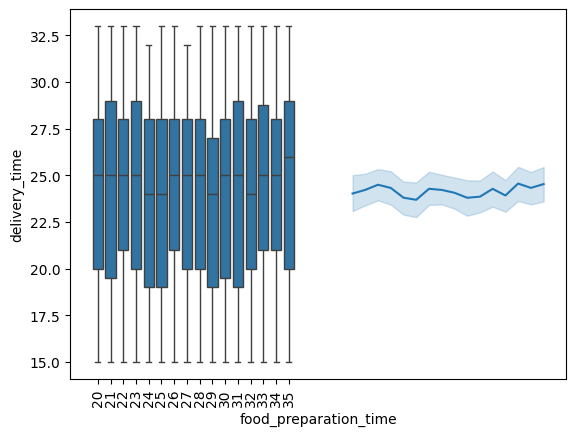

In [142]:
plt.xticks(rotation=90)
sns.boxplot(data=df, y = 'delivery_time', x = 'food_preparation_time') #creating a box plot of food prep times vs. delivery time
sns.lineplot(data=df, y = 'delivery_time', x = 'food_preparation_time') # creating the same line distribution in a line plot 


- ##### The barplots do not show too much of a correlation between food preparation time and delivery time 
    - ##### It does not look like if the food takes longer to prepare it takes longer to deliver or vice versa 
- ##### The lineplot does not show much of an overall trend either, it seems there is a slight upwards trend towards the end but not too significant

,count,mean,std,min,25%,50%,75%,max
rating,,,,,,,,
3,188.0,24.558511,4.652845,15.0,21.0,25.0,28.0,33.0
4,386.0,23.867876,4.923377,15.0,20.0,24.0,28.0,33.0
5,588.0,24.212585,5.018607,15.0,20.0,25.0,28.0,33.0
Not given,736.0,24.173913,5.041021,15.0,20.0,25.0,28.0,33.0


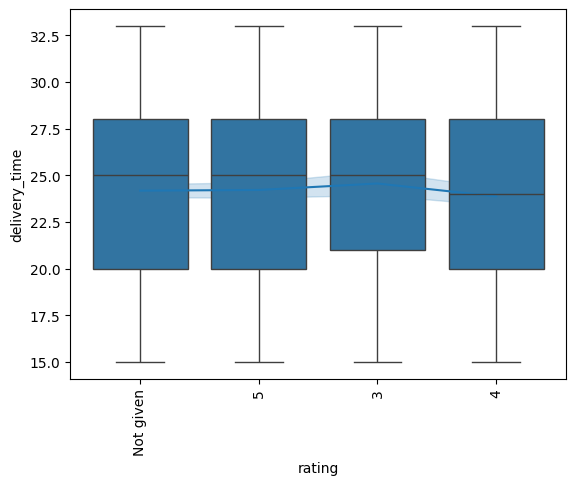

In [143]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x = 'rating', y = 'delivery_time') # creating a displaying distribution of delivery time based on each rating
sns.lineplot(data=df, y = 'delivery_time', x = 'rating') # creating a line plot of the same distribution 
df.groupby(['rating'])['delivery_time'].describe() #displaying the descriptive stats of the same distribution 

- ##### Since the statistics for delivery time do not change much and the lineplot seems relatively stagnant with different rating, it seems there is not a strong correlation between the two variables yet.

<Axes: xlabel='rating', ylabel='food_preparation_time'>

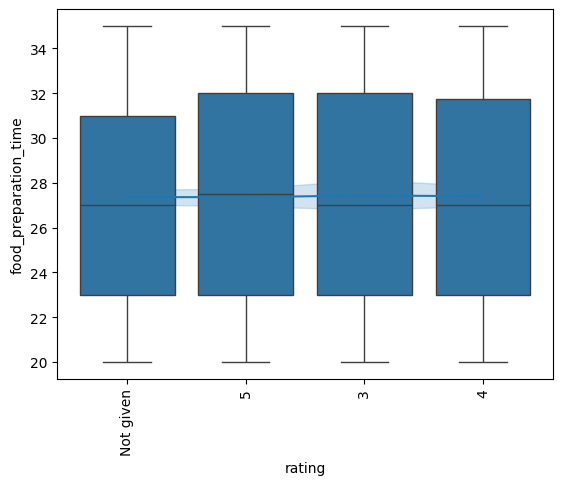

In [144]:
plt.xticks(rotation=90)
sns.boxplot(data=df, x = 'rating', y = 'food_preparation_time') #creating a box plot displaying the food prep time based on rating
# df.groupby(['rating'])['food_preparation_time'].describe() 
sns.lineplot(data=df, x = 'rating', y = 'food_preparation_time') #creating a line plot of the same distribution 

- ##### Similar to delivery time, it seems there is not a strong correlation between rating and food preparation time yet

In [145]:
# plt.xticks(rotation=90)

x = df["customer_id"].value_counts()  #creating a new df based on the number each customer ordered
# print(x[x>1])
print(x[x>1].sum()) #checking the sum of customers who ordered more than once to see how many orders they made up 
x = x[x>1] #modifying the df to contain customers who ordered more than once 
repeat = df[df['customer_id'].isin(x.index)] #creating another based on the original df to contain only vustomers who ordered more than once
repeat = repeat.sort_values(by='customer_id') # sorting 

# sns.countplot(data=repeat, x = 'customer_id', hue = 'cuisine_type', palette='bright')
repeat['cuisine_type'].value_counts() #displaying the number of repeat orders for each cuisine 

1114


cuisine_type
American          324
Japanese          309
Italian           161
Chinese           118
Indian             46
Mexican            38
Middle Eastern     32
Mediterranean      26
French             15
Thai               11
Korean             10
Southern            9
Spanish             9
Vietnamese          6
Name: count, dtype: int64

- ##### There are 416 customers who ordered more than once totaling for 1114 orders 
- ##### Most customers reordered American and Japanese Food with a noticeable amount reordering Italian and Chinese as well

In [146]:
x = repeat[['cuisine_type','day_of_the_week']].value_counts() #displaying repeat orders for each cuisine and the day of the week 
x


cuisine_type    day_of_the_week
American        Weekend            233
Japanese        Weekend            224
Italian         Weekend            110
Chinese         Weekend             93
American        Weekday             91
Japanese        Weekday             85
Italian         Weekday             51
Indian          Weekend             33
Mexican         Weekend             30
Chinese         Weekday             25
Mediterranean   Weekend             20
Middle Eastern  Weekend             20
Indian          Weekday             13
French          Weekend             12
Middle Eastern  Weekday             12
Thai            Weekend              9
Spanish         Weekend              8
Korean          Weekend              8
Mexican         Weekday              8
Southern        Weekend              6
Mediterranean   Weekday              6
Southern        Weekday              3
French          Weekday              3
Vietnamese      Weekday              3
                Weekend         

- ##### Spanish cuisine has only one reorder during the weekdays 
- ##### Middle Eastern Food has the smallest difference in reorders from the weekdays to weekends with only 8 more on the weekend

mean: 16.311188299817182, std: 7.47952092053642


<Axes: xlabel='cost_of_the_order', ylabel='rating'>

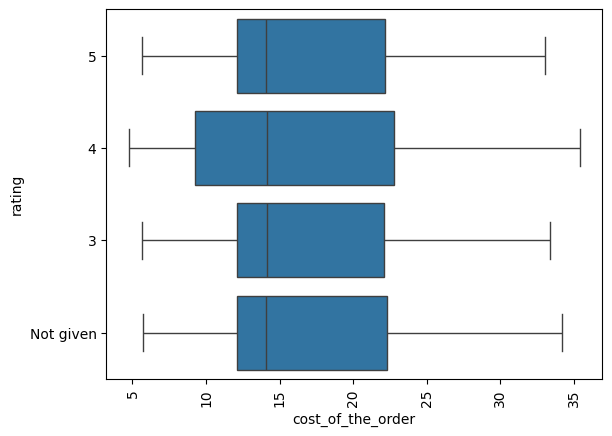

In [147]:
plt.xticks(rotation=90)
xVar = df[df['day_of_the_week'] == "Weekday"].cost_of_the_order #cost of the order for orders on the weekend 
yVar = df[df['day_of_the_week'] == "Weekday"].rating # rating of orders on the weekend
print("mean: " + str(xVar.mean()) + ", std: " + str(xVar.std())) # mean and std
sns.boxplot(data=df, y = yVar, x = xVar ) #boxplot based on those vars 


- ##### The average cost of an order during the weekdays is about 16$, but it seems the ratings are somewhat skewed for a rating of 4. There are more cheaper orders and more expensive orders with a rating of 4 than with any other rating
- ##### It seems the very cheap and very expensive orders are receieving more 4s as a rating than any other rating

mean: 16.574833456698745, std: 7.486978906001369


<Axes: xlabel='cost_of_the_order', ylabel='rating'>

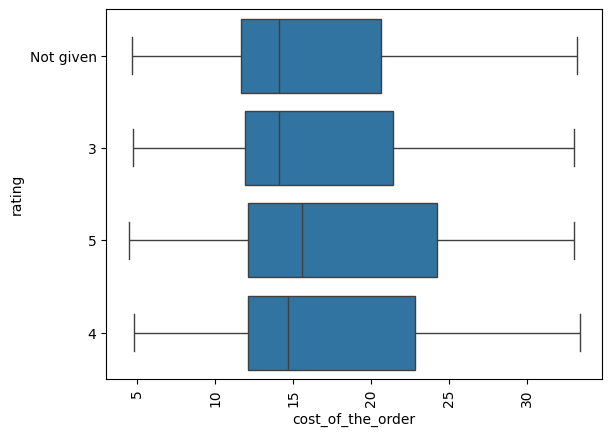

In [148]:
plt.xticks(rotation=90)
xVar = df[df['day_of_the_week'] == "Weekend"].cost_of_the_order
print("mean: " + str(xVar.mean()) + ", std: " + str(xVar.std()))
yVar = df[df['day_of_the_week'] == "Weekend"].rating
sns.boxplot(data=df, y = yVar, x = xVar ) #creating the same boxplot and statistics as the last cell, but with the weekend instead 

- ##### The rating vs cost of order distribution over the weekend seems similar to that of the weekdays 
- ##### Something noticeable is that the median cost for a 5 is the greatest median cost in comparison to other ratings 
- ##### The median cost for each rating is a bit higher than the median cost for each rating during the weekdays - this could be due to the increase in orders places 

<Axes: xlabel='delivery_time', ylabel='cuisine_type'>

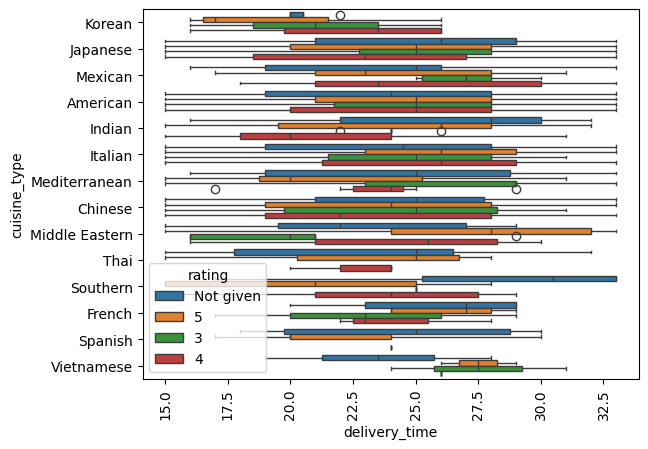

In [149]:
plt.xticks(rotation=90)

sns.boxplot(data=df, y = 'cuisine_type', x = 'delivery_time', hue= 'rating' )#creating a box plot of delivery time based on cuisine type with each rating 

- ##### There is a noticeable amount of 5 ratings with relatively short delivery_time and a noticeable amount of 3 ratings with relatively long delivery_times 

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [150]:
# Write the code here
filter = df[['restaurant_name','rating']] #making another df with only restaurant name and taing column
filter = filter[filter['rating'] != 'Not given'] #making the sure the df only contains orders with ratings
rating_count = filter['restaurant_name'].value_counts() # checking the amount of rating each restaurant got
rating_count50 = rating_count[rating_count>50] #including only restaurants with more than 50 ratings 
filter = filter[filter['restaurant_name'].isin(rating_count50.index)] #going back to the first modified rating and making it only contain restaurants with more than 50 order 
filter.rating = pd.to_numeric(filter['rating']) # converting the ratings to numbers 
filter.groupby(['restaurant_name'])['rating'].describe() #getting the descriptive stats of the rating distribution on restaurants with more than 5- orders 

,count,mean,std,min,25%,50%,75%,max
restaurant_name,,,,,,,,
Blue Ribbon Fried Chicken,64.0,4.328125,0.757076,3.0,4.0,4.5,5.0,5.0
Blue Ribbon Sushi,73.0,4.219178,0.786105,3.0,4.0,4.0,5.0,5.0
Shake Shack,133.0,4.278195,0.742165,3.0,4.0,4.0,5.0,5.0
The Meatball Shop,84.0,4.511905,0.702732,3.0,4.0,5.0,5.0,5.0


#### Observations:


- ##### The restaurants filling this criteria are:
    - ##### Blue Ribbon Fried Chicken 
    - ##### Blue Ribbon Sushi
    - ##### Shake Shack
    - ##### The Meatball Shop
    

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders

In [151]:
# Write the code here
filter5 = df[df.cost_of_the_order<=20] #creating a df with orders that cost <= 20
filter5 = df[df.cost_of_the_order>5] #modifying that df to having orders with cost > 5
filter20 = df[df.cost_of_the_order>20] #creating a new df with orders that cost more than 20
(filter5.cost_of_the_order.sum() * 0.15) + (filter20.cost_of_the_order.sum() * .25) # adding the net revenue for each df and summing it up 


np.float64(8379.539499999999)

- ##### The net revenue is $6166.30

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered)

In [154]:
# Write the code here
times = pd.DataFrame({"prep": df.food_preparation_time,
                     "delivery": df.delivery_time,
                     "total": df.food_preparation_time+df.delivery_time}) #creating a new df with only timings
print((times[times.total>60].count().iloc[0]/df.count().iloc[0]) * 100) #checking what percentage of orders have a total time of more than 60 min 

10.537407797681771


- ##### 10.5% of orders take more than 60 minutes to get delivered from the time the order is placed

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [153]:
# Write the code here
print("Mean, STD")
print("Weekend: " + str(df[df['day_of_the_week'] == 'Weekend'].delivery_time.mean()) + ", " + str(df[df['day_of_the_week'] == 'Weekend'].delivery_time.std())) #displaying mean and std of delivery time on weekend
print("Weekend: " + str(df[df['day_of_the_week'] == 'Weekday'].delivery_time.mean()) + ", " + str(df[df['day_of_the_week'] == 'Weekday'].delivery_time.std()))#displaying mean and std of delivery time on weekday




Mean, STD
Weekend: 22.4700222057735, 4.628937635045018
Weekend: 28.340036563071298, 2.891427648206771


- ##### The mean delivery time during the weekend is 22.47 minutes with a standard deviation of 4.63 minutes 
- ##### The mean delivery time during the weekday is 28.34 minutes with a standard deviation of 2.89 minutes 
- ##### Overall, the delivery time during the weekdays is higher on average than the delivery time on the weekend.
    - ##### Even though it is higher during the weekdays, delivery time is more consistent on the weekdays than on the weekends


#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations)

### Conclusions:
*  The preparation times are around 20-30 minutes  
* From the great amount of restaurants, there are only a few restuarants that are heavily ordered from 
* There is more volume of orders on the weekend 
* There were more no ratings given rather than a number most of the time; there were a good amount of 5s given as well
* There wasn't too strong of a correlation between cost, prep time, and delivery time 
* Similar to resaurants, there was an obvious concentration in the cuisines ordered from 
* There was a slight visual relationship between cuisines and the day of the week
* In summation, it seems most variables operated independently due to the weak correlations between each other 
* Different cuisines have different preparation times 
* There is some correlation with a higher rating and short prep time 
* Delivery time seems to be a bit shorter on the weekends 
* Cost of order seems to vary by cuisine type

### Recommendations:

*  One recommendation I would have is to improve efficiency on the weekdays, since weekend timings seem to be better even though there is a higher concentration of orders on the weekend 
* I would recommend to further promote American and Japanese cuisines since they are already popular and making the company money 
* Use promotions on specific days where order volumes might be lower or delivery times are longer to balance workload and improve service consistency
* Use promotions based on cuisines, since some cuisines were underperforming 
* Work on consistency of food prep and delivery times, since some restaurants had a great standard deviations 
* I would recommend a better feedback system since I saw too many "Not given" ratings 
* Investigate outliers to better improve service and pricing 

---